In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [6]:

df = pd.read_csv('Telco-Customer-Churn.csv')

df.head()


,customerID;gender;SeniorCitizen;Partner;Dependents;tenure;PhoneService;MultipleLines;InternetService;OnlineSecurity;OnlineBackup;DeviceProtection;TechSupport;StreamingTV;StreamingMovies;Contract;PaperlessBilling;PaymentMethod;MonthlyCharges;TotalCharges;Churn
0,7590-VHVEG;Female;0;Yes;No;1;No;No phone servi...
1,5575-GNVDE;Male;0;No;No;34;Yes;No;DSL;Yes;No;Y...
2,3668-QPYBK;Male;0;No;No;2;Yes;No;DSL;Yes;Yes;N...
3,7795-CFOCW;Male;0;No;No;45;No;No phone service...
4,9237-HQITU;Female;0;No;No;2;Yes;No;Fiber optic...


In [7]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                               --------------  ----- 
 0   customerID;gender;SeniorCitizen;Partner;Dependents;tenure;PhoneService;MultipleLines;InternetService;OnlineSecurity;OnlineBackup;DeviceProtection;TechSupport;StreamingTV;StreamingMovies;Contract;PaperlessBilling;PaymentMethod;MonthlyCharges;TotalCharges;Churn  7043 non-null   object
dtypes: object(1)
memory us

In [8]:
df = pd.read_csv('Telco-Customer-Churn.csv', sep=';')


In [9]:
df.head(100
       )


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


In [10]:

df = df.drop(['customerID'], axis=1)


df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Kategorik sütunlar:", categorical_cols)
print("Sayısal sütunlar:", numerical_cols)


Kategorik sütunlar: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
Sayısal sütunlar: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [12]:

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [13]:

df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [16]:

df = df.dropna()


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    if col != 'Churn':  
        df[col] = le.fit_transform(df[col])


In [18]:

X = df.drop(['Churn'], axis=1)
y = df['Churn']


In [19]:
df.info

<bound method DataFrame.info of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0        

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


Accuracy: 0.7963094393186657

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



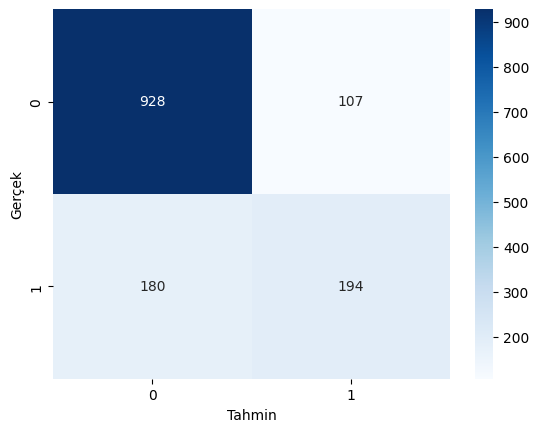

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("Accuracy:", accuracy_score(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()


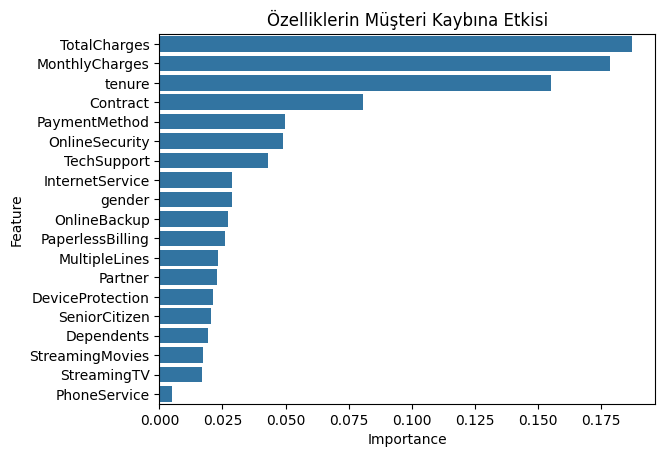

In [24]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Özelliklerin Müşteri Kaybına Etkisi")
plt.show()


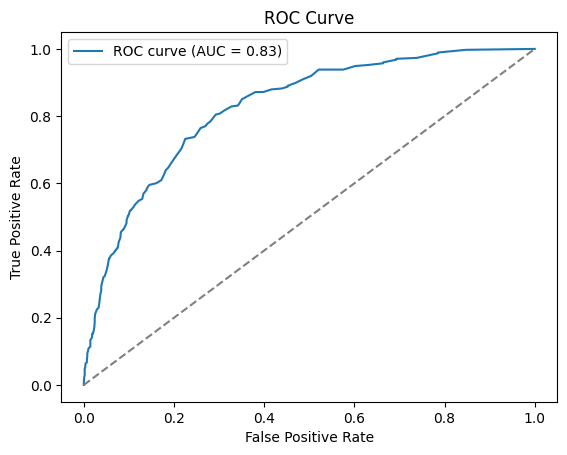

In [25]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

y_prob = rf_model.predict_proba(X_test)[:,1]  

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [26]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


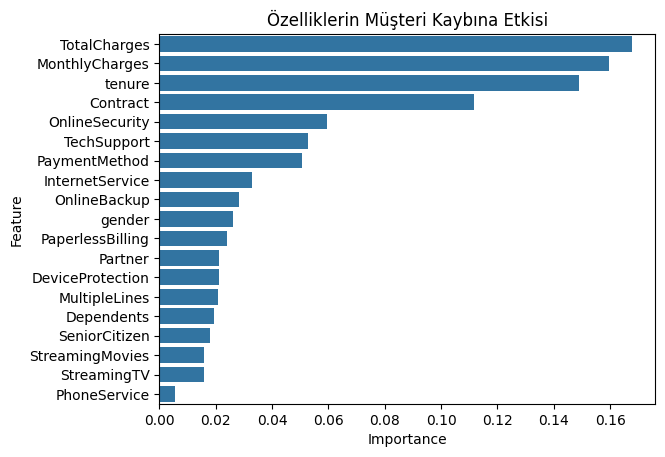

In [27]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Özelliklerin Müşteri Kaybına Etkisi")
plt.show()

In [28]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,75,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,537,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,675,1


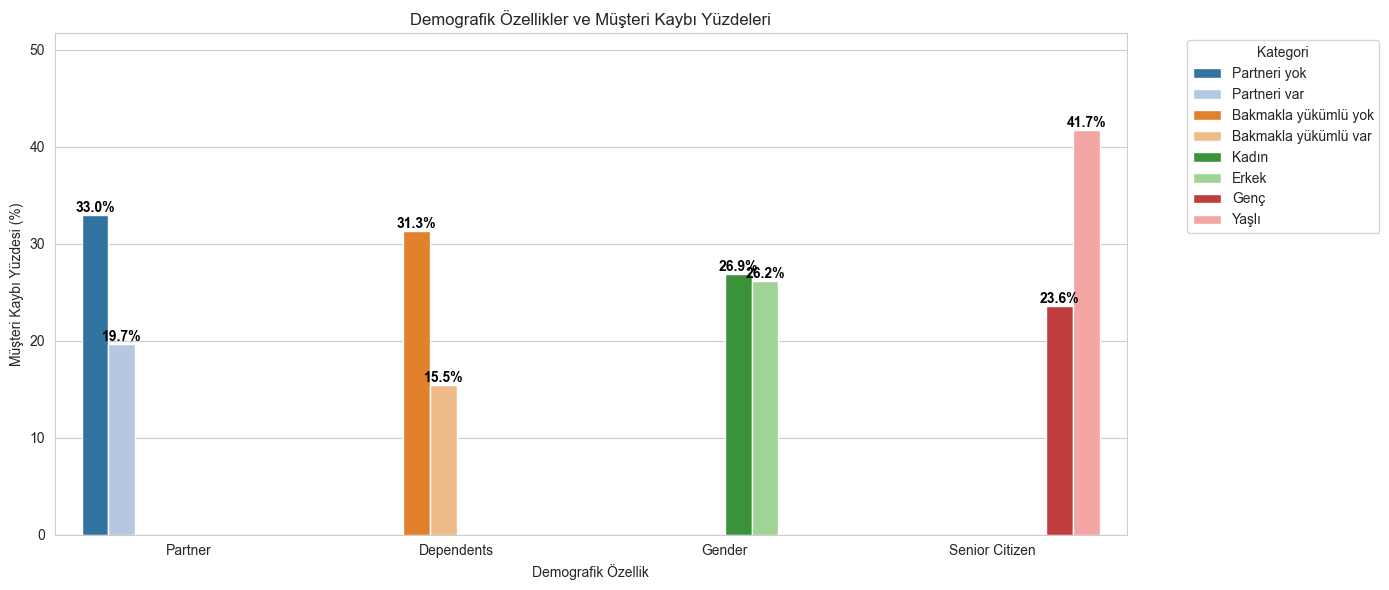

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Demografik kolonlar
demographic_cols = ['Partner', 'Dependents', 'gender', 'SeniorCitizen']

# Daha okunaklı Feature isimleri
feature_labels = {
    'Partner': 'Partner',
    'Dependents': 'Dependents',
    'gender': 'Gender',
    'SeniorCitizen': 'Senior Citizen'
}

# Kategori isimleri mapping
category_mapping = {
    'Partner': {0: 'Partneri yok', 1: 'Partneri var'},
    'Dependents': {0: 'Bakmakla yükümlü yok', 1: 'Bakmakla yükümlü var'},
    'SeniorCitizen': {0: 'Genç', 1: 'Yaşlı'},
    'gender': {0: 'Kadın', 1: 'Erkek'}
}

# Renk paleti, her özelliğin 2 kategorisine ayrı tonlar
color_palette = ['#1f77b4', '#aec7e8',  # Partner
                 '#ff7f0e', '#ffbb78',  # Dependents
                 '#2ca02c', '#98df8a',  # Gender
                 '#d62728', '#ff9896']  # SeniorCitizen

# Tüm verileri tek dataframe’de topluyoruz
all_churn = pd.DataFrame()

for col in demographic_cols:
    total = df.groupby(col).size()
    churn_count = df.groupby(col)['Churn'].sum()
    churn_percent = (churn_count / total * 100).reset_index()
    churn_percent.columns = [col, 'ChurnPercent']
    
    # Kategori isimlerini mapping ile değiştir
    churn_percent['Category'] = churn_percent[col].map(category_mapping[col])
    churn_percent['Feature'] = feature_labels[col]  # okunaklı isim
    all_churn = pd.concat([all_churn, churn_percent], axis=0)

# Barplot
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

barplot = sns.barplot(x='Feature', y='ChurnPercent', hue='Category', data=all_churn,
                      palette=color_palette)

# Barların üstüne yüzdelik değerleri yazma (sadece >0)
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{height:.1f}%', 
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.ylabel('Müşteri Kaybı Yüzdesi (%)')
plt.xlabel('Demografik Özellik')
plt.title('Demografik Özellikler ve Müşteri Kaybı Yüzdeleri')
plt.ylim(0, all_churn['ChurnPercent'].max() + 10)
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
#Sadece bu dört bilgi ile müşterinin churn etme olasılığını ne kadar doğru tahmin edebiliriz

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Demografik kolonlar
demo_cols = ['Partner', 'Dependents', 'gender', 'SeniorCitizen']

# Eğer gender hala string ise LabelEncoder ile 0/1 yap
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])  # Kadın=0, Erkek=1

# X ve y
X = df[demo_cols]
y = df['Churn']

# Eğitim ve test seti (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

# Skorlar
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("F1 Score:", round(f1, 3))
print("\nClassification Report:\n", report)

# Feature önemleri (coefficients)
import numpy as np
coeff_df = pd.DataFrame({
    'Feature': demo_cols,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nDemografik Özelliklerin Etkisi (Coefficient):")
print(coeff_df)


Accuracy: 0.735
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409


Demografik Özelliklerin Etkisi (Coefficient):
         Feature  Coefficient
3  SeniorCitizen     0.722722
2         gender    -0.046923
0        Partner    -0.482177
1     Dependents    -0.534862


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [32]:
#The results indicate that demographic information alone is limited for predicting churn, but it is valuable for understanding trends and gaining insights through visualization

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/1928376444.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette=['#1f77b4','#ff7f0e'])


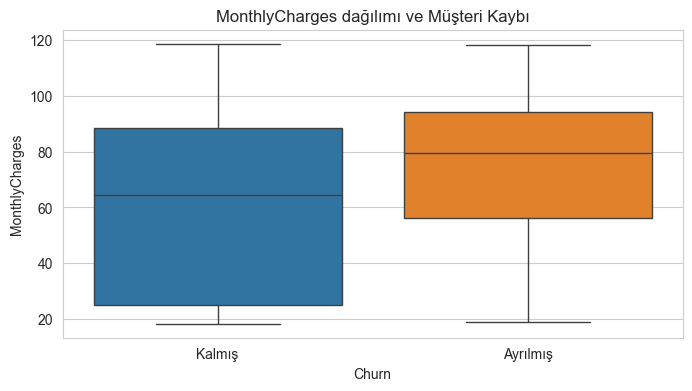

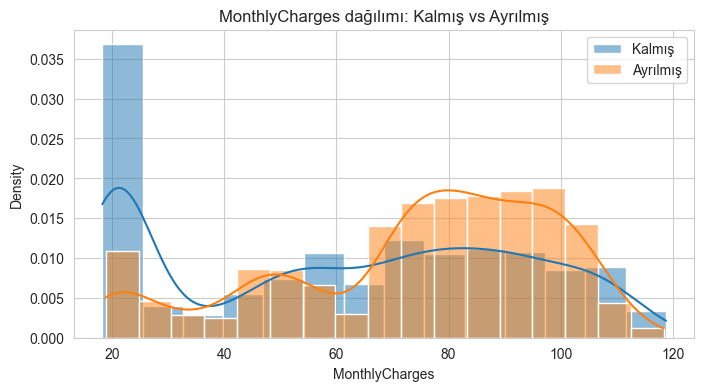

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/1928376444.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette=['#1f77b4','#ff7f0e'])


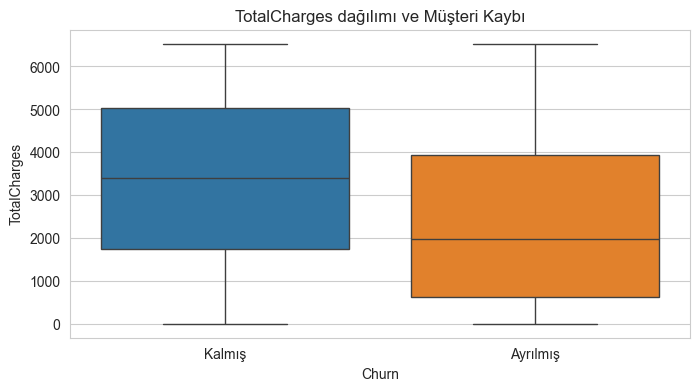

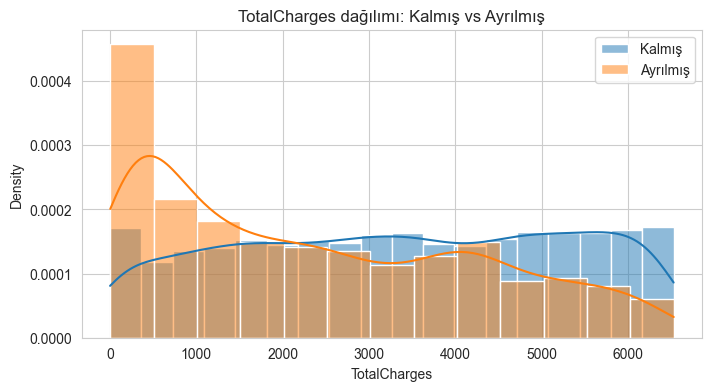

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/1928376444.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette=['#1f77b4','#ff7f0e'])


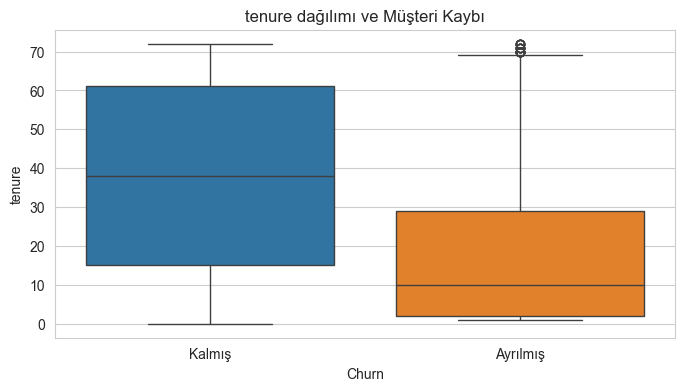

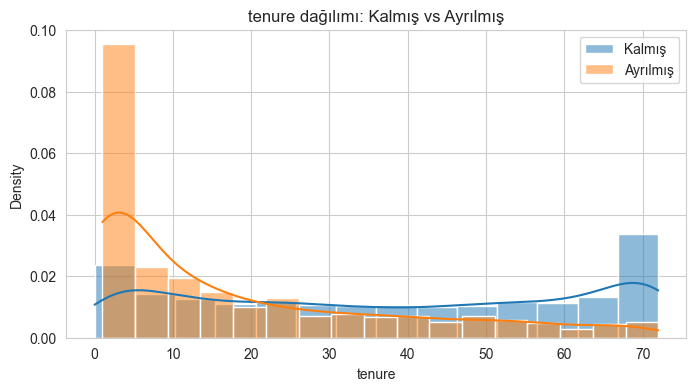

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

for feature in continuous_features:
    plt.figure(figsize=(8,4))
    
    sns.boxplot(x='Churn', y=feature, data=df, palette=['#1f77b4','#ff7f0e'])
    plt.title(f'{feature} dağılımı ve Müşteri Kaybı')
    plt.xticks([0,1], ['Kalmış', 'Ayrılmış'])
    plt.ylabel(feature)
    plt.xlabel('Churn')
    plt.show()
    
    # Histogram ile dağılım
    plt.figure(figsize=(8,4))
    sns.histplot(df[df['Churn']==0][feature], color='#1f77b4', label='Kalmış', kde=True, stat="density")
    sns.histplot(df[df['Churn']==1][feature], color='#ff7f0e', label='Ayrılmış', kde=True, stat="density")
    plt.title(f'{feature} dağılımı: Kalmış vs Ayrılmış')
    plt.xlabel(feature)
    plt.legend()
    plt.show()


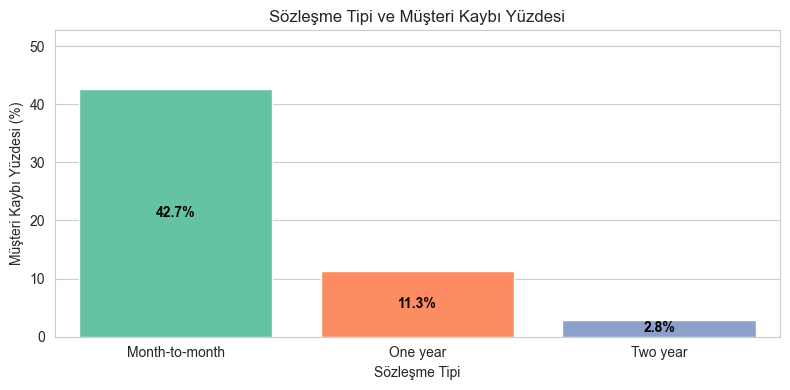

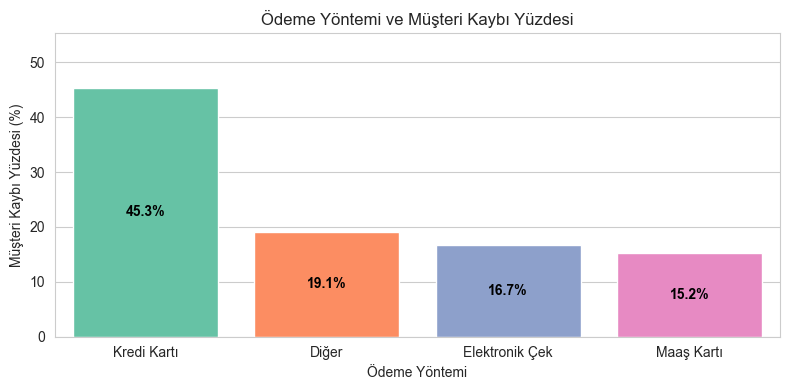

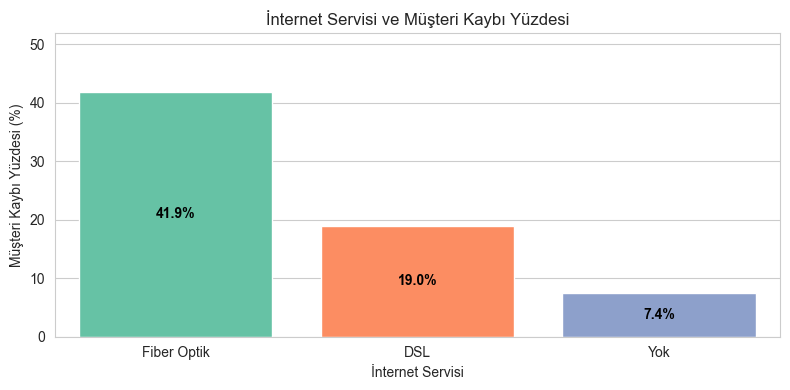

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorical_features = ['Contract', 'PaymentMethod', 'InternetService']

# Kategori eşleştirmeleri
contract_mapping = {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
payment_mapping = {0: 'Elektronik Çek', 1: 'Maaş Kartı', 2: 'Kredi Kartı', 3: 'Diğer'}
internet_mapping = {0: 'DSL', 1: 'Fiber Optik', 2: 'Yok'}

# Türkçe başlıklar
feature_labels = {
    'Contract': 'Sözleşme Tipi',
    'PaymentMethod': 'Ödeme Yöntemi',
    'InternetService': 'İnternet Servisi'
}

# Renk paleti (matplotlib renkleri)
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

for feature in categorical_features:
    # Mapping
    if feature == 'Contract':
        df[feature + '_label'] = df[feature].map(contract_mapping)
    elif feature == 'PaymentMethod':
        df[feature + '_label'] = df[feature].map(payment_mapping)
    elif feature == 'InternetService':
        df[feature + '_label'] = df[feature].map(internet_mapping)
    
    # Yüzdelik churn
    churn_percent = df.groupby(feature + '_label')['Churn'].mean() * 100
    churn_percent = churn_percent.reset_index().sort_values(by='Churn', ascending=False)
    
    # Grafik
    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=feature + '_label', y='Churn', data=churn_percent, color=None)  # palette yok, hue yok
    
    # Renkleri manuel ver
    for bar, color in zip(ax.patches, colors[:len(churn_percent)]):
        bar.set_facecolor(color)
    
    # Barların içine yüzdelik yaz
    for bar, value in zip(ax.patches, churn_percent['Churn']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height/2, f'{value:.1f}%', ha='center', va='center', color='black', fontweight='bold')
    
    plt.ylabel('Müşteri Kaybı Yüzdesi (%)')
    plt.xlabel(feature_labels[feature])
    plt.title(f'{feature_labels[feature]} ve Müşteri Kaybı Yüzdesi')
    plt.ylim(0, churn_percent['Churn'].max() + 10)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/842774931.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Contract'] = X['Contract'].map({0:0, 1:1, 2:2})  # zaten numeric ama örnek olarak
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/842774931.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Partner'] = X['Partner'].map({0:0, 1:1})
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/842774931.py:20: SettingWithCopyWarning: 
A value is trying to

Accuracy: 0.766
F1 Score: 0.506

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1552
           1       0.57      0.45      0.51       561

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.77      0.76      2113



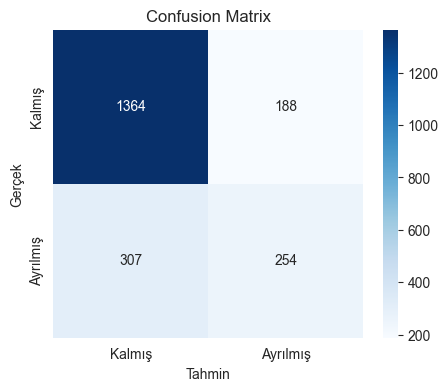

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/842774931.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


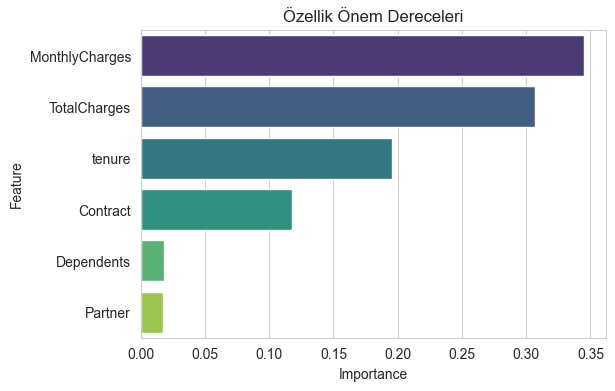

          Feature  Importance
1  MonthlyCharges    0.344594
2    TotalCharges    0.306713
3          tenure    0.195347
0        Contract    0.117526
5      Dependents    0.018138
4         Partner    0.017682

Yeni müşteri için churn tahmini: %46.0


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# 1️⃣ Önemli özellikleri seç
# ----------------------
features = ['Contract', 'MonthlyCharges', 'TotalCharges', 'tenure', 'Partner', 'Dependents']
X = df[features]
y = df['Churn']

# Categorical -> numeric mapping
X['Contract'] = X['Contract'].map({0:0, 1:1, 2:2})  # zaten numeric ama örnek olarak
X['Partner'] = X['Partner'].map({0:0, 1:1})
X['Dependents'] = X['Dependents'].map({0:0, 1:1})

# Eksik değer varsa doldur (TotalCharges gibi)
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].median())

# ----------------------
# 2️⃣ Eğitim ve test seti
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ----------------------
# 3️⃣ Standardizasyon (opsiyonel ama iyi)
# ----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------
# 4️⃣ Model: Random Forest
# ----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Tahmin
y_pred = model.predict(X_test_scaled)

# ----------------------
# 5️⃣ Performans
# ----------------------
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 Score:", round(f1_score(y_test, y_pred),3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Kalmış','Ayrılmış'], yticklabels=['Kalmış','Ayrılmış'])
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.title('Confusion Matrix')
plt.show()

# ----------------------
# 6️⃣ Feature Importance
# ----------------------
importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Özellik Önem Dereceleri')
plt.show()

print(importance)

# ----------------------
# 7️⃣ Yeni bir müşteri örneği
# ----------------------
# Örnek veri: [Contract, MonthlyCharges, TotalCharges, tenure, Partner, Dependents]
new_customer = pd.DataFrame({
    'Contract':[0],           # Month-to-month
    'MonthlyCharges':[85],
    'TotalCharges':[2000],
    'tenure':[12],
    'Partner':[1],
    'Dependents':[0]
})

new_customer_scaled = scaler.transform(new_customer)
prob = model.predict_proba(new_customer_scaled)[0][1]  # Churn olasılığı

print(f"\nYeni müşteri için churn tahmini: %{prob*100:.1f}")


Accuracy: 0.783
F1 Score: 0.542

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/1491842959.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


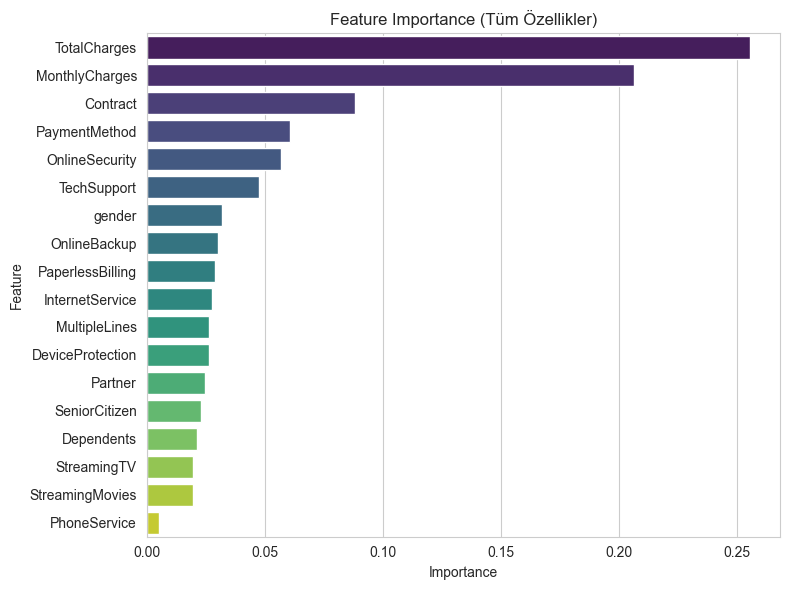

             Feature  Importance
14      TotalCharges    0.255329
13    MonthlyCharges    0.206223
15          Contract    0.088023
16     PaymentMethod    0.060812
5     OnlineSecurity    0.057072
8        TechSupport    0.047600
2             gender    0.032026
6       OnlineBackup    0.030152
17  PaperlessBilling    0.028731
4    InternetService    0.027798
11     MultipleLines    0.026425
7   DeviceProtection    0.026272
0            Partner    0.024799
3      SeniorCitizen    0.023027
1         Dependents    0.021176
9        StreamingTV    0.019813
10   StreamingMovies    0.019437
12      PhoneService    0.005285


/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/1491842959.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_importance.keys()), y=list(category_importance.values()), palette='Set2')


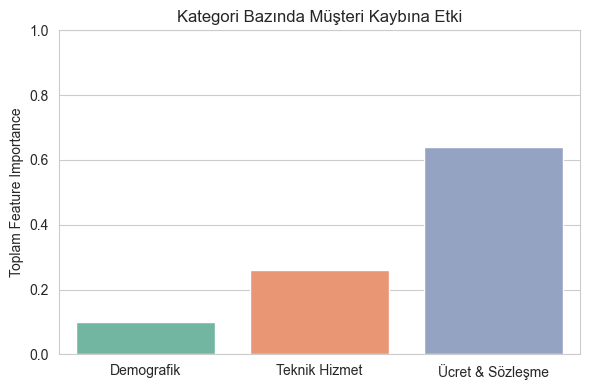


Kategori bazında toplam etki:
Demografik: 0.101
Teknik Hizmet: 0.260
Ücret & Sözleşme: 0.639


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# ----------------------
# 1️⃣ Feature kategorileri (df kolon isimlerine göre)
# ----------------------
demographic = ['Partner', 'Dependents', 'gender', 'SeniorCitizen']
technical = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PhoneService']
billing = ['MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'PaperlessBilling']

all_features = demographic + technical + billing

# ----------------------
# 2️⃣ Veri hazırlığı
# ----------------------
X = df[all_features].copy()
y = df['Churn']

# Categorical mapping
X['Contract'] = X['Contract'].map({0:0, 1:1, 2:2})
X['PaymentMethod'] = X['PaymentMethod'].map({0:0, 1:1, 2:2, 3:3})
X['InternetService'] = X['InternetService'].map({0:0,1:1,2:2})
X['PaperlessBilling'] = X['PaperlessBilling'].map({0:0,1:1})

# Eksik değerler (TotalCharges gibi)
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].median())

# ----------------------
# 3️⃣ Train/Test split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizasyon
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------
# 4️⃣ Random Forest modeli
# ----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Performans
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 Score:", round(f1_score(y_test, y_pred),3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------
# 5️⃣ Feature Importance
# ----------------------
importance = pd.DataFrame({'Feature': all_features, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Feature Importance (Tüm Özellikler)')
plt.tight_layout()
plt.show()
print(importance)

# ----------------------
# 6️⃣ Kategori bazında toplam etki
# ----------------------
category_importance = {
    'Demografik': importance[importance['Feature'].isin(demographic)]['Importance'].sum(),
    'Teknik Hizmet': importance[importance['Feature'].isin(technical)]['Importance'].sum(),
    'Ücret & Sözleşme': importance[importance['Feature'].isin(billing)]['Importance'].sum()
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(category_importance.keys()), y=list(category_importance.values()), palette='Set2')
plt.ylabel('Toplam Feature Importance')
plt.title('Kategori Bazında Müşteri Kaybına Etki')
plt.ylim(0,1)
plt.tight_layout()
plt.show()
print("\nKategori bazında toplam etki:")
for cat, val in category_importance.items():
    print(f"{cat}: {val:.3f}")


/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/3660937938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


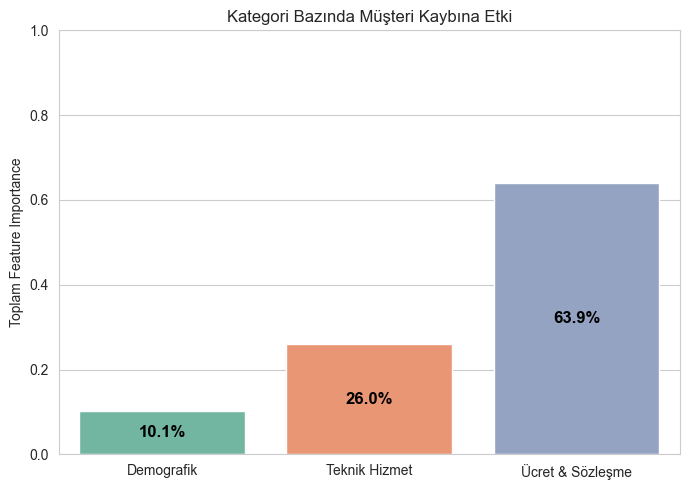

In [37]:
plt.figure(figsize=(7,5))
ax = sns.barplot(
    x=list(category_importance.keys()), 
    y=list(category_importance.values()), 
    palette=['#66c2a5', '#fc8d62', '#8da0cb']  # gözü yormayan kontrastlı renkler
)

plt.ylabel('Toplam Feature Importance')
plt.title('Kategori Bazında Müşteri Kaybına Etki')
plt.ylim(0,1)

# Barların içine yüzdelik değerleri yaz
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height/2, f'{height*100:.1f}%', 
            ha='center', va='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


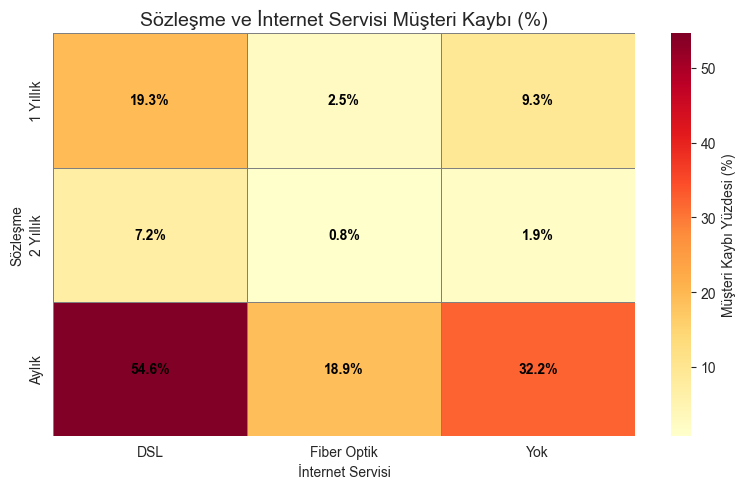

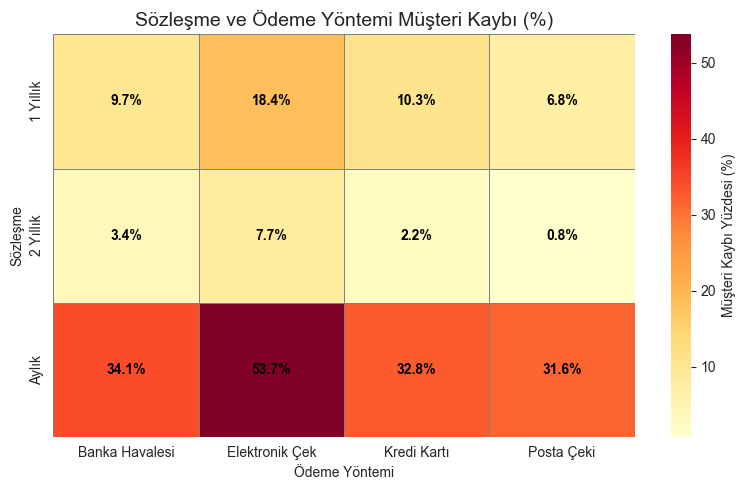

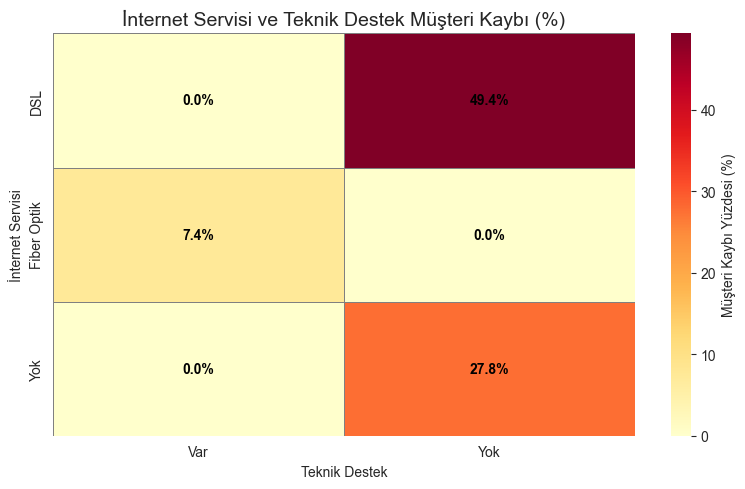

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mapping dictionary (okunabilir label için)
contract_map = {0:'Aylık', 1:'1 Yıllık', 2:'2 Yıllık'}
payment_map = {0:'Banka Havalesi', 1:'Kredi Kartı', 2:'Elektronik Çek', 3:'Posta Çeki'}
internet_map = {0:'Yok', 1:'DSL', 2:'Fiber Optik'}
techsupport_map = {0:'Yok', 1:'Var'}

# Label mapping
df['Sözleşme'] = df['Contract'].map(contract_map)
df['Ödeme Yöntemi'] = df['PaymentMethod'].map(payment_map)
df['İnternet Servisi'] = df['InternetService'].map(internet_map)
df['Teknik Destek'] = df['TechSupport'].map(techsupport_map)

# İncelenecek kombinasyonlar
cross_features = [
    ('Sözleşme', 'İnternet Servisi'),
    ('Sözleşme', 'Ödeme Yöntemi'),
    ('İnternet Servisi', 'Teknik Destek')
]

for f1, f2 in cross_features:
    # Pivot table: Churn yüzdesi
    pivot = df.pivot_table(index=f1, columns=f2, values='Churn', aggfunc='mean') * 100
    pivot = pivot.fillna(0)
    
    plt.figure(figsize=(8,5))
    ax = sns.heatmap(
        pivot, annot=False, fmt=".1f", cmap='YlOrRd', 
        cbar_kws={'label': 'Müşteri Kaybı Yüzdesi (%)'}, linewidths=0.5, linecolor='gray'
    )
    
    plt.title(f'{f1} ve {f2} Müşteri Kaybı (%)', fontsize=14)
    plt.ylabel(f1)
    plt.xlabel(f2)
    
    # Yüzdelik değerleri hücre içine ekle
    for i in range(pivot.shape[0]):
        for j in range(pivot.shape[1]):
            val = pivot.iloc[i,j]
            ax.text(j + 0.5, i + 0.5, f'{val:.1f}%', 
                    ha='center', va='center', color='black', weight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()


/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/4091757095.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_percent = df.groupby(feature+'_bin_label')['Churn'].mean() * 100
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/4091757095.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


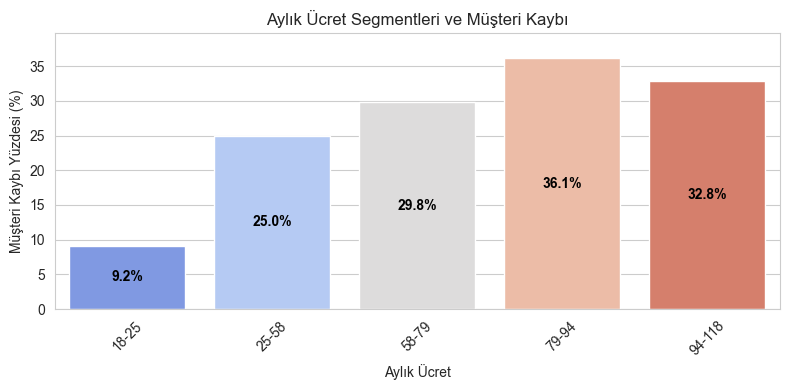

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/4091757095.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_percent = df.groupby(feature+'_bin_label')['Churn'].mean() * 100
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/4091757095.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


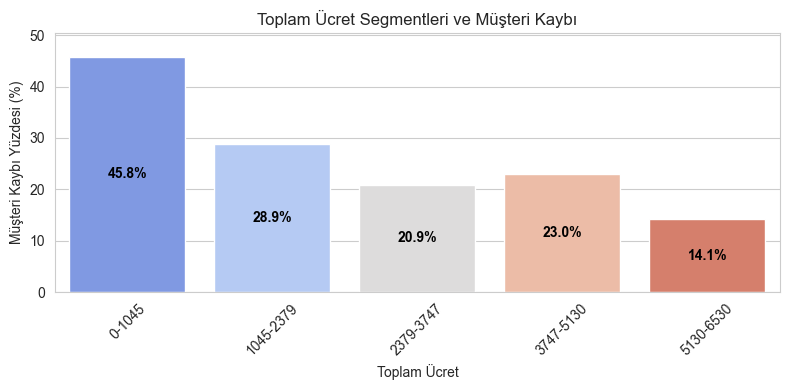

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/4091757095.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_percent = df.groupby(feature+'_bin_label')['Churn'].mean() * 100
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/4091757095.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


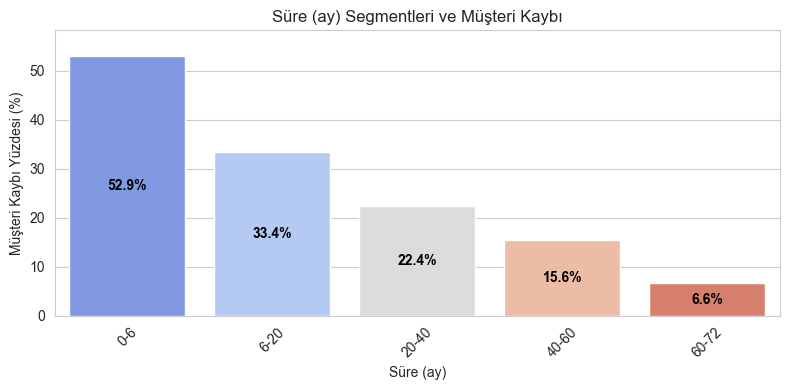

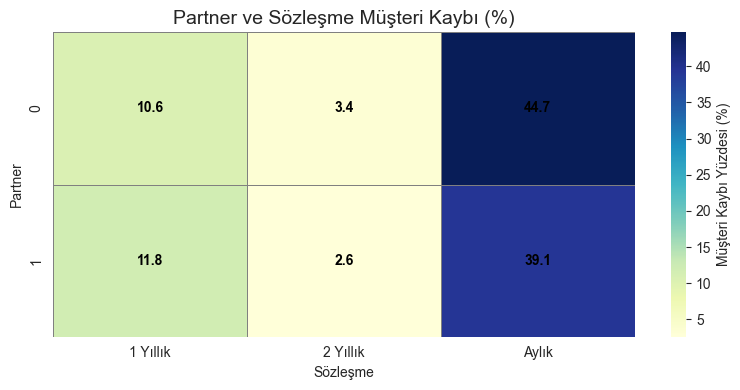

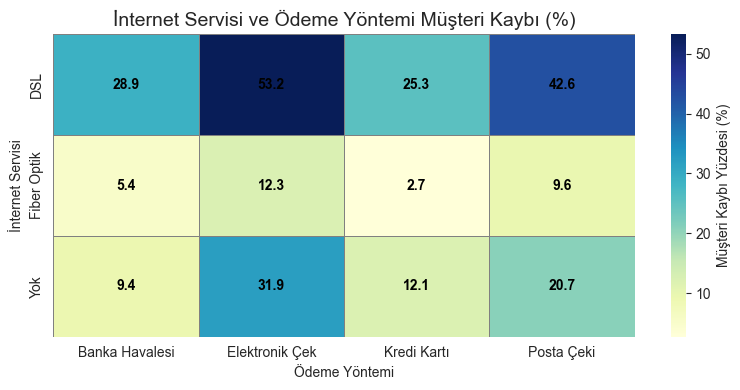

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# 1️⃣ Sürekli değişkenlerde kırılma noktaları (okunabilir label)
# ----------------------
continuous_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
continuous_names = {'MonthlyCharges':'Aylık Ücret', 
                    'TotalCharges':'Toplam Ücret', 
                    'tenure':'Süre (ay)'}

for feature in continuous_features:
    # 5 segmentli kategoriye ayır
    bins = pd.qcut(df[feature], q=5, duplicates='drop')
    
    # Binleri daha okunabilir label haline getir
    bin_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in bins.cat.categories]
    df[feature+'_bin_label'] = pd.qcut(df[feature], q=5, duplicates='drop', labels=bin_labels)
    
    # Her segmentte churn yüzdesi
    churn_percent = df.groupby(feature+'_bin_label')['Churn'].mean() * 100
    
    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')
    
    # Barların içine yüzdelik değerleri yaz
    for i, val in enumerate(churn_percent.values):
        ax.text(i, val/2, f'{val:.1f}%', ha='center', va='center', color='black', fontweight='bold')
    
    plt.xticks(rotation=45)
    plt.ylabel('Müşteri Kaybı Yüzdesi (%)')
    plt.xlabel(continuous_names[feature])
    plt.title(f'{continuous_names[feature]} Segmentleri ve Müşteri Kaybı')
    plt.ylim(0, churn_percent.max()*1.1)
    plt.tight_layout()
    plt.show()

# ----------------------
# 2️⃣ Kategori etkileşimleri (Çapraz analiz heatmap)
# ----------------------

# Mapping dictionary
contract_map = {0:'Aylık', 1:'1 Yıllık', 2:'2 Yıllık'}
payment_map = {0:'Banka Havalesi', 1:'Kredi Kartı', 2:'Elektronik Çek', 3:'Posta Çeki'}
internet_map = {0:'Yok', 1:'DSL', 2:'Fiber Optik'}

# Mapping uygula
df['Sözleşme'] = df['Contract'].map(contract_map)
df['Ödeme Yöntemi'] = df['PaymentMethod'].map(payment_map)
df['İnternet Servisi'] = df['InternetService'].map(internet_map)

# İncelenecek çiftler
cross_features = [('Partner', 'Sözleşme'), ('İnternet Servisi', 'Ödeme Yöntemi')]

for f1, f2 in cross_features:
    # Pivot table ile churn yüzdesi
    pivot = df.pivot_table(index=f1, columns=f2, values='Churn', aggfunc='mean') * 100
    pivot = pivot.fillna(0)
    
    plt.figure(figsize=(8,4))
    ax = sns.heatmap(
        pivot, annot=True, fmt=".1f", cmap='YlGnBu',
        cbar_kws={'label': 'Müşteri Kaybı Yüzdesi (%)'},
        linewidths=0.5, linecolor='gray', annot_kws={"size":10, "weight":"bold", "color":"black"}
    )
    
    plt.title(f'{f1} ve {f2} Müşteri Kaybı (%)', fontsize=14)
    plt.ylabel(f1)
    plt.xlabel(f2)
    plt.tight_layout()
    plt.show()


In [40]:
print(df.columns)
demographic = ['Partner', 'Dependents', 'gender', 'SeniorCitizen']
technical = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PhoneService']
billing = ['MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'PaperlessBilling']


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Contract_label',
       'PaymentMethod_label', 'InternetService_label', 'Sözleşme',
       'Ödeme Yöntemi', 'İnternet Servisi', 'Teknik Destek',
       'MonthlyCharges_bin_label', 'TotalCharges_bin_label',
       'tenure_bin_label'],
      dtype='object')



Logistic Regression Model Performansı
------------------------
Accuracy: 0.804
F1 Score: 0.583

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Model Performansı
------------------------
Accuracy: 0.793
F1 Score: 0.569

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Gradient Boosting Model Performansı
------------------------
Accuracy: 0.797
F1 Score: 0.574

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/3897101150.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(20), palette='coolwarm')


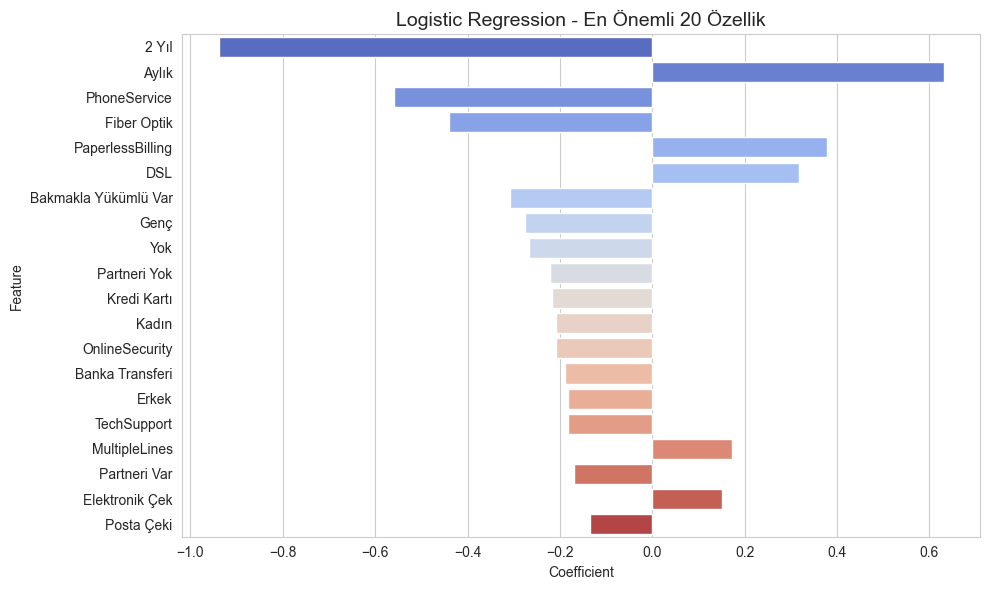

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/3897101150.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_df.head(20), palette='viridis')


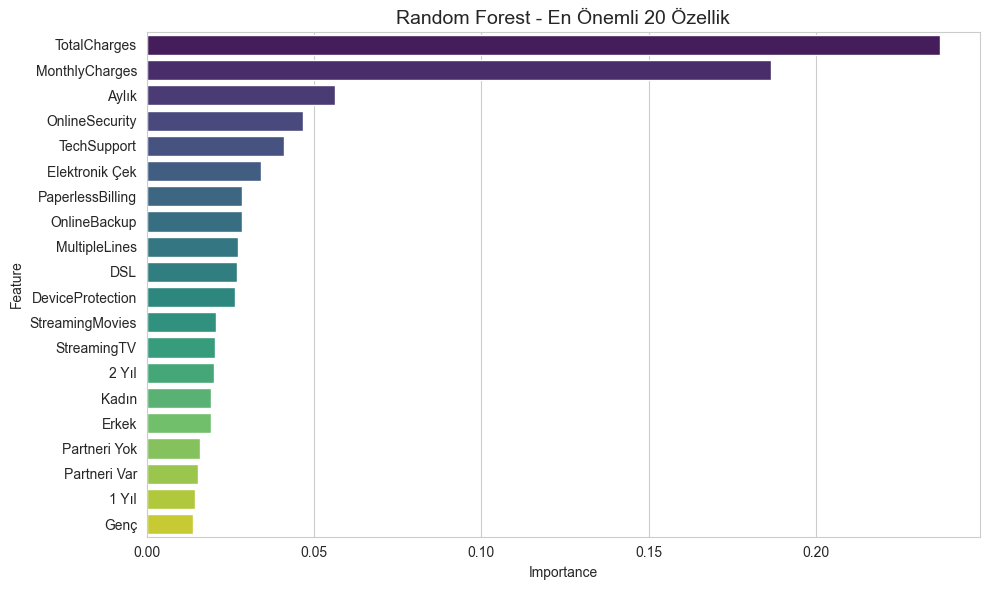

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/3897101150.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=gb_df.head(20), palette='magma')


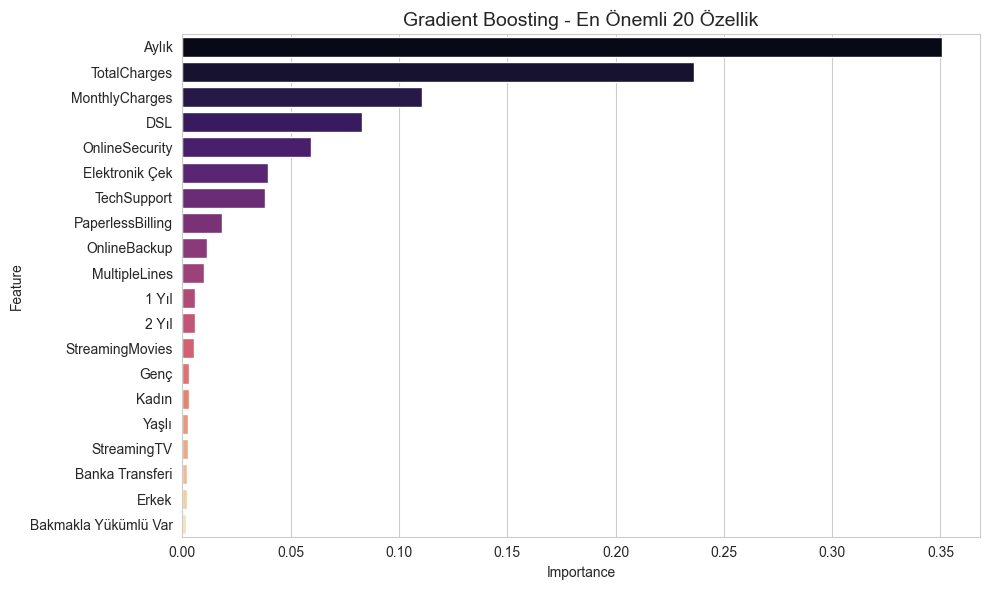


📊 Modellerin Karşılaştırmalı Performansı
                 Model  Accuracy  F1 Score
0  Logistic Regression  0.804116  0.583082
1        Random Forest  0.792761  0.569322
2    Gradient Boosting  0.797019  0.574405


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# 0️⃣ Kategori mapping (okunabilir ve sade)
# ----------------------
category_maps = {
    'gender': {0: 'Kadın', 1: 'Erkek'},
    'Partner': {0: 'Partneri Yok', 1: 'Partneri Var'},
    'Dependents': {0: 'Bakmakla Yükümlü Yok', 1: 'Bakmakla Yükümlü Var'},
    'SeniorCitizen': {0: 'Genç', 1: 'Yaşlı'},
    'Contract': {0: 'Aylık', 1: '1 Yıl', 2: '2 Yıl'},
    'PaymentMethod': {0: 'Banka Transferi', 1: 'Kredi Kartı', 2: 'Elektronik Çek', 3: 'Posta Çeki'},
    'InternetService': {0: 'Yok', 1: 'DSL', 2: 'Fiber Optik'}
}

for col, mapping in category_maps.items():
    if col in df.columns:
        df[col+'_label'] = df[col].map(mapping)
    else:
        df[col+'_label'] = df[col]

# ----------------------
# 1️⃣ Özellikleri ve hedefi belirle
# ----------------------
demographic = ['Partner_label', 'Dependents_label', 'gender_label', 'SeniorCitizen_label']
technical = ['InternetService_label', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PhoneService']
billing = ['MonthlyCharges', 'TotalCharges', 'Contract_label', 'PaymentMethod_label', 'PaperlessBilling']

all_features = demographic + technical + billing
target = 'Churn'

X = df[all_features]
y = df[target]

# ----------------------
# 2️⃣ Categorical ve numerical kolonları ayır
# ----------------------
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# ----------------------
# 3️⃣ Veri setini eğitim ve test olarak ayır
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------------
# 4️⃣ Preprocessing: OneHotEncoding
# ----------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ], remainder='passthrough'
)

# ----------------------
# 5️⃣ Modelleri oluştur ve pipeline ile bağla
# ----------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name} Model Performansı")
    print("------------------------")
    print(f"Accuracy: {acc:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    results[name] = {'model': pipe, 'accuracy': acc, 'f1_score': f1}

# ----------------------
# 6️⃣ Feature names yeniden düzenle (sadece okunabilir label kalacak)
# ----------------------
ohe_features = results['Logistic Regression']['model'].named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
# Her bir ohe_feature için prefixi kaldırıyoruz
ohe_features_clean = [f.split('_')[-1] for f in ohe_features]  # sadece Kadın, Erkek, Partneri Var, vb.

feature_names = list(ohe_features_clean) + numerical_cols

# ----------------------
# 7️⃣ Feature importance grafikleri
# ----------------------
# Logistic Regression coefficients
lr_model = results['Logistic Regression']['model'].named_steps['classifier']
coefficients = lr_model.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(20), palette='coolwarm')
plt.title('Logistic Regression - En Önemli 20 Özellik', fontsize=14)
plt.tight_layout()
plt.show()

# Random Forest Feature Importance
rf_model = results['Random Forest']['model'].named_steps['classifier']
rf_importances = rf_model.feature_importances_
rf_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_df = rf_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=rf_df.head(20), palette='viridis')
plt.title('Random Forest - En Önemli 20 Özellik', fontsize=14)
plt.tight_layout()
plt.show()

# Gradient Boosting Feature Importance
gb_model = results['Gradient Boosting']['model'].named_steps['classifier']
gb_importances = gb_model.feature_importances_
gb_df = pd.DataFrame({'Feature': feature_names, 'Importance': gb_importances})
gb_df = gb_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=gb_df.head(20), palette='magma')
plt.title('Gradient Boosting - En Önemli 20 Özellik', fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------
# 8️⃣ Modellerin karşılaştırmalı performansı
# ----------------------
perf_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'F1 Score': [results[m]['f1_score'] for m in results]
})

print("\n📊 Modellerin Karşılaştırmalı Performansı")
print(perf_df)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/445086011.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(20), palette='coolwarm')


Logistic Regression Performansı
-------------------------------
Accuracy: 0.804
F1 Score: 0.583

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



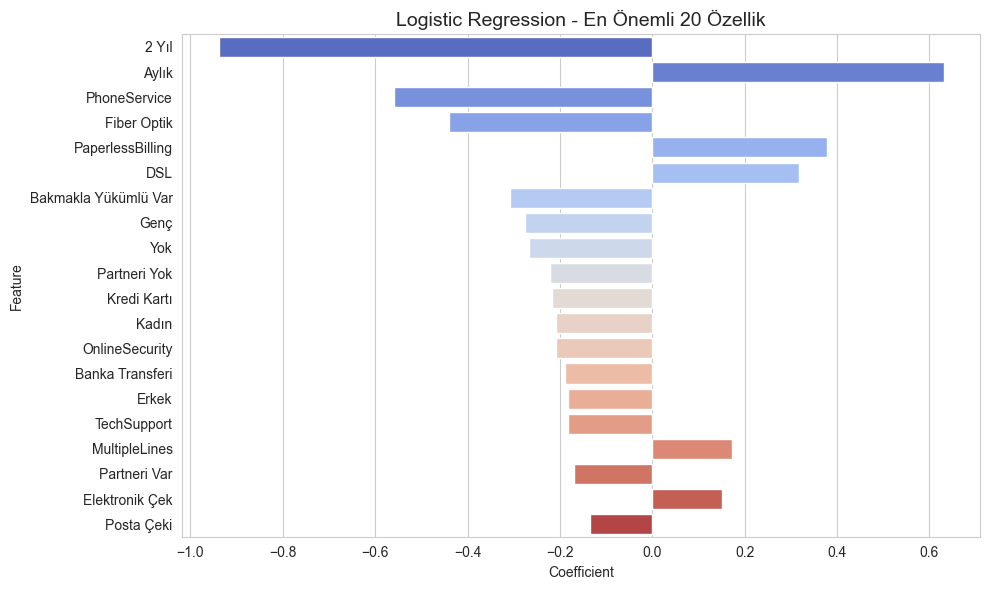


Demografik Özellikler


/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/445086011.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


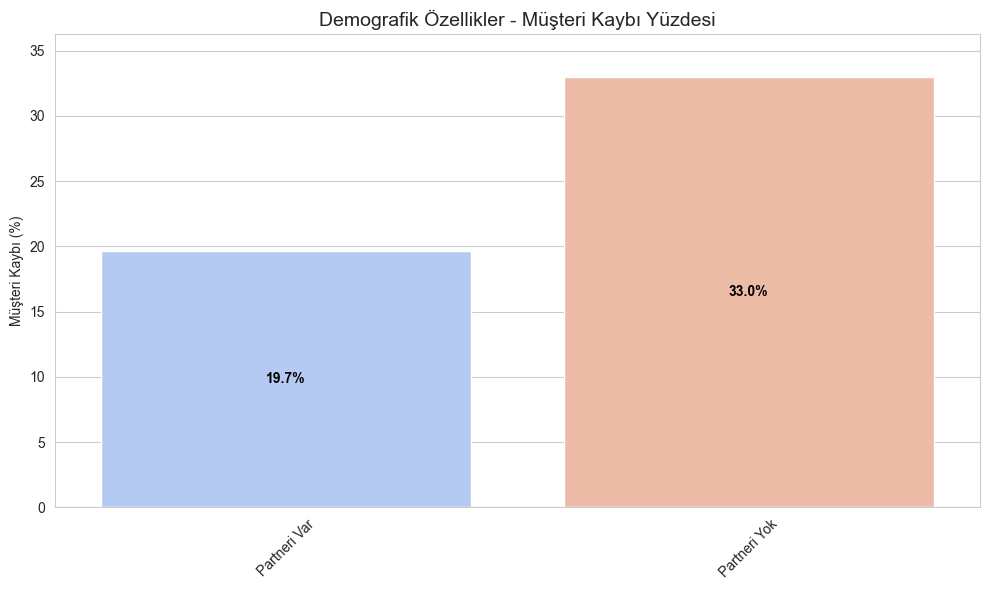

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/445086011.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


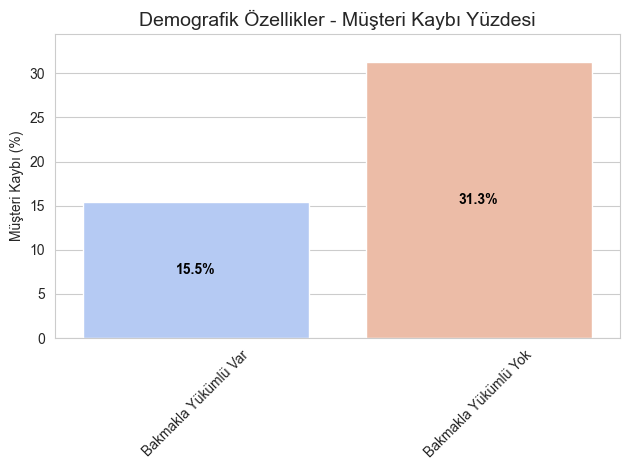

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/445086011.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


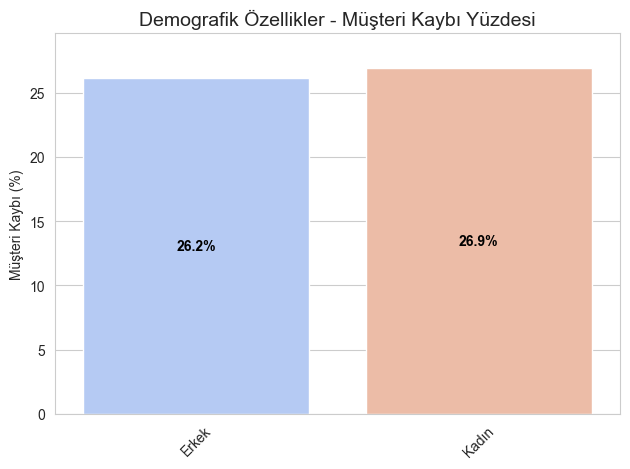

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/445086011.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


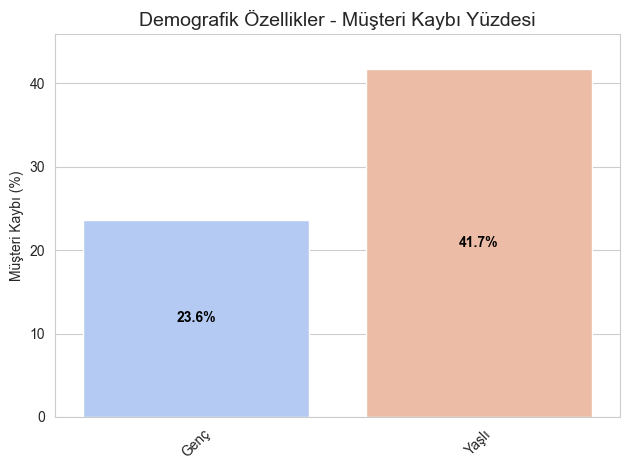


Teknik Hizmetler


/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/445086011.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


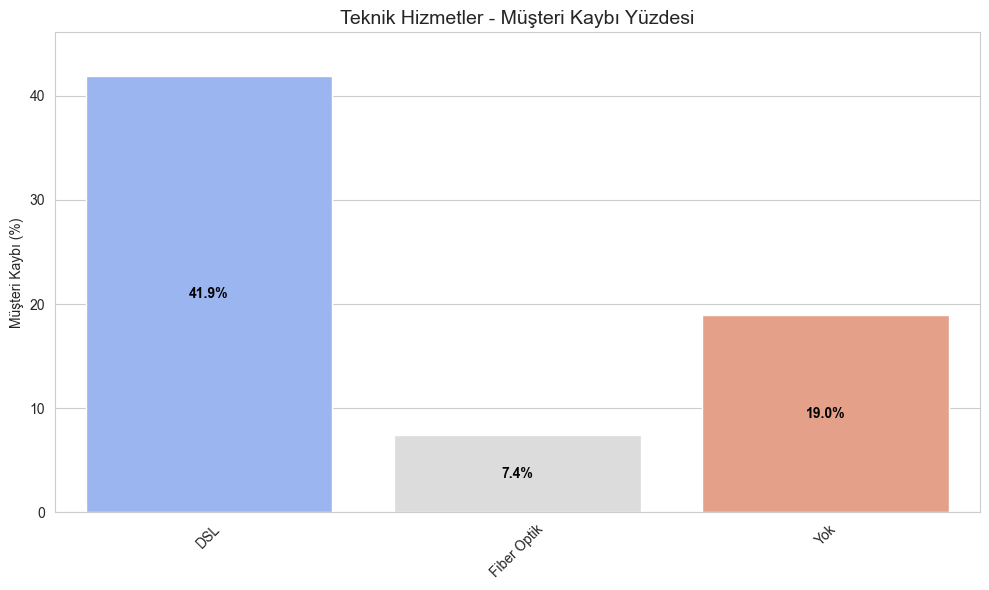


Ücret ve Sözleşme


/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/445086011.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


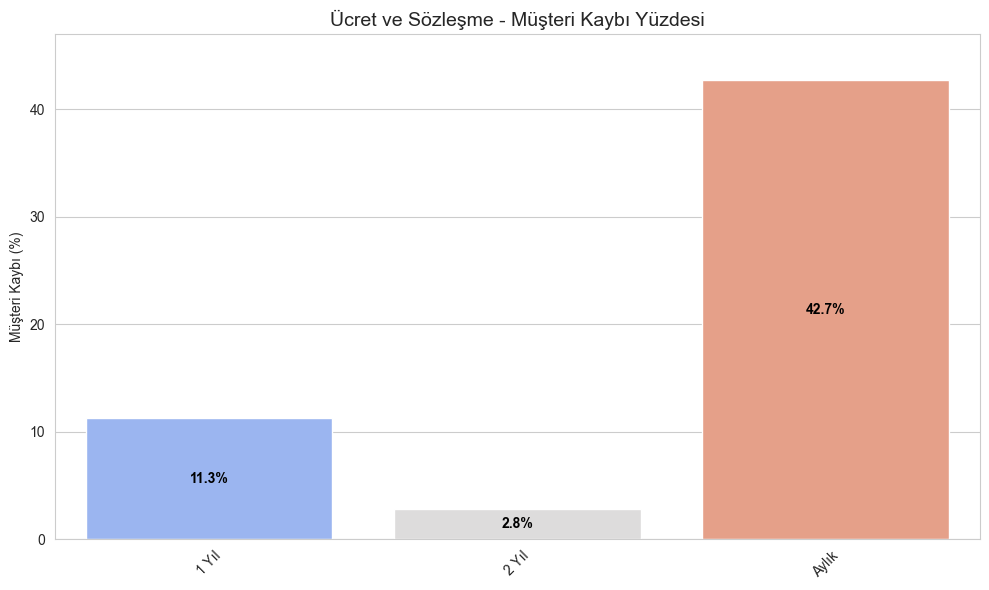

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/445086011.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


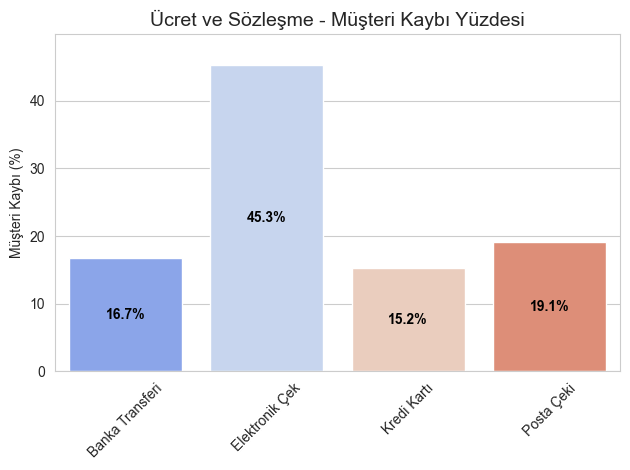

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# ----------------------
# 0️⃣ Kategori mapping (okunabilir ve sade Türkçe)
# ----------------------
category_maps = {
    'gender': {0: 'Kadın', 1: 'Erkek'},
    'Partner': {0: 'Partneri Yok', 1: 'Partneri Var'},
    'Dependents': {0: 'Bakmakla Yükümlü Yok', 1: 'Bakmakla Yükümlü Var'},
    'SeniorCitizen': {0: 'Genç', 1: 'Yaşlı'},
    'Contract': {0: 'Aylık', 1: '1 Yıl', 2: '2 Yıl'},
    'PaymentMethod': {0: 'Banka Transferi', 1: 'Kredi Kartı', 2: 'Elektronik Çek', 3: 'Posta Çeki'},
    'InternetService': {0: 'Yok', 1: 'DSL', 2: 'Fiber Optik'}
}

for col, mapping in category_maps.items():
    if col in df.columns:
        df[col+'_label'] = df[col].map(mapping)
    else:
        df[col+'_label'] = df[col]

# ----------------------
# 1️⃣ Özellikleri ve hedefi belirle
# ----------------------
demographic = ['Partner_label', 'Dependents_label', 'gender_label', 'SeniorCitizen_label']
technical = ['InternetService_label', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PhoneService']
billing = ['MonthlyCharges', 'TotalCharges', 'Contract_label', 'PaymentMethod_label', 'PaperlessBilling']

all_features = demographic + technical + billing
target = 'Churn'

X = df[all_features]
y = df[target]

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# ----------------------
# 2️⃣ Veri setini eğitim ve test olarak ayır
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ----------------------
# 3️⃣ Preprocessing ve Logistic Regression pipeline
# ----------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

# ----------------------
# 4️⃣ Performans ölçümü
# ----------------------
print("Logistic Regression Performansı")
print("-------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ----------------------
# 5️⃣ Feature importance
# ----------------------
ohe_features = lr_pipe.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
ohe_features_clean = [f.split('_')[-1] for f in ohe_features]  # sadece Kadın, Erkek, vb.
feature_names = list(ohe_features_clean) + numerical_cols

coefficients = lr_pipe.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(20), palette='coolwarm')
plt.title('Logistic Regression - En Önemli 20 Özellik', fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------
# 6️⃣ Demografik, teknik, ücret gruplarının etkisi (yüzdelik grafik)
# ----------------------
def plot_churn_percentage(features, title):
    plt.figure(figsize=(10,6))
    for feature in features:
        if df[feature].dtype == 'object':
            churn_percent = df.groupby(feature)['Churn'].mean() * 100
            sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')
            for i, val in enumerate(churn_percent.values):
                plt.text(i, val/2, f'{val:.1f}%', ha='center', va='center', fontweight='bold', color='black')
            plt.title(f'{title} - Müşteri Kaybı Yüzdesi', fontsize=14)
            plt.ylabel('Müşteri Kaybı (%)')
            plt.xlabel('')
            plt.xticks(rotation=45)
            plt.ylim(0, churn_percent.max()*1.1)
            plt.tight_layout()
            plt.show()

print("\nDemografik Özellikler")
plot_churn_percentage(demographic, 'Demografik Özellikler')

print("\nTeknik Hizmetler")
plot_churn_percentage(technical, 'Teknik Hizmetler')

print("\nÜcret ve Sözleşme")
plot_churn_percentage(billing, 'Ücret ve Sözleşme')


📌 Logistic Regression Performansı
Accuracy: 0.804
F1 Score: 0.583

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/12152348.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Katsayı', y='Özellik', data=coef_df.head(20), palette='coolwarm')


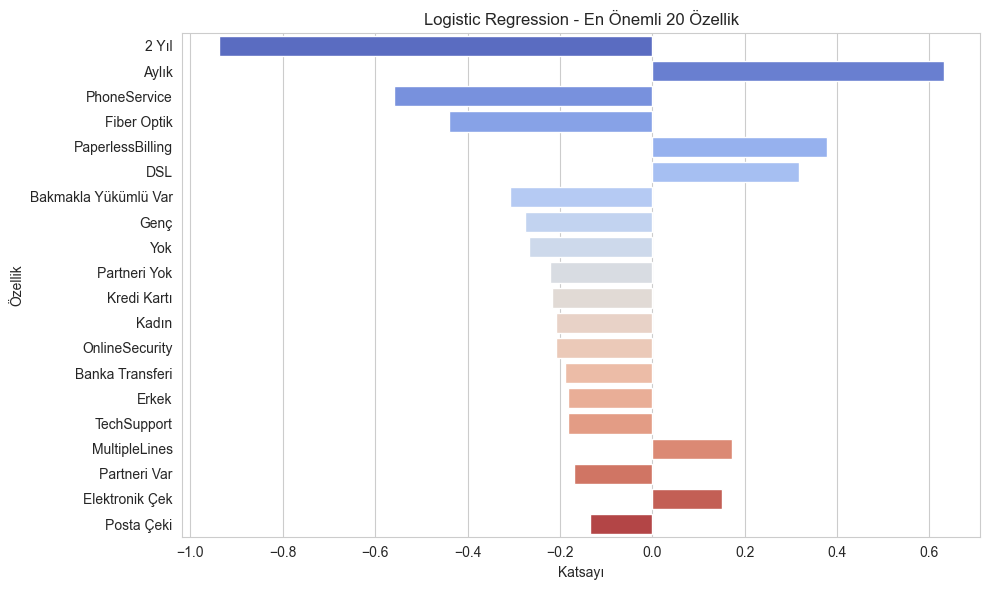

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/12152348.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_percent = df.groupby(feature+'_bin_label')['Churn'].mean() * 100
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/12152348.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


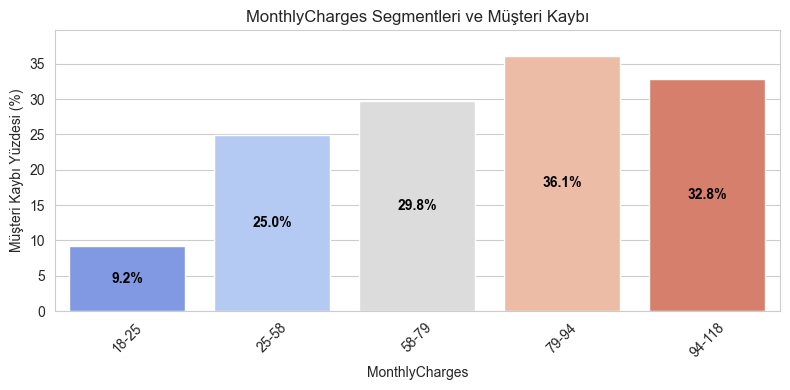

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/12152348.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_percent = df.groupby(feature+'_bin_label')['Churn'].mean() * 100
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/12152348.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


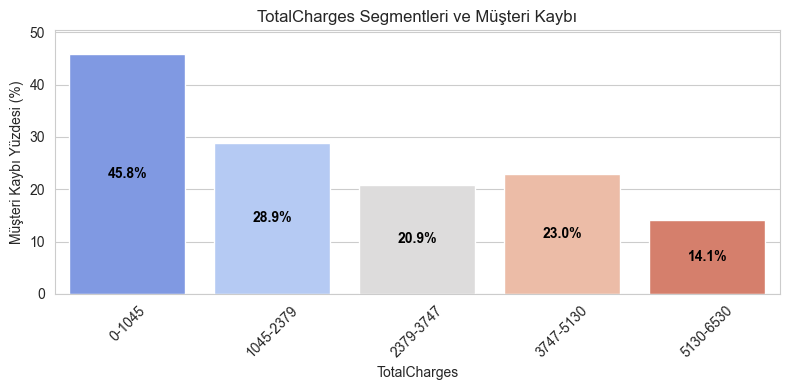

/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/12152348.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_percent = df.groupby(feature+'_bin_label')['Churn'].mean() * 100
/var/folders/3p/2v05l3g94wj6wsmdn_hg9nmh0000gn/T/ipykernel_58295/12152348.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')


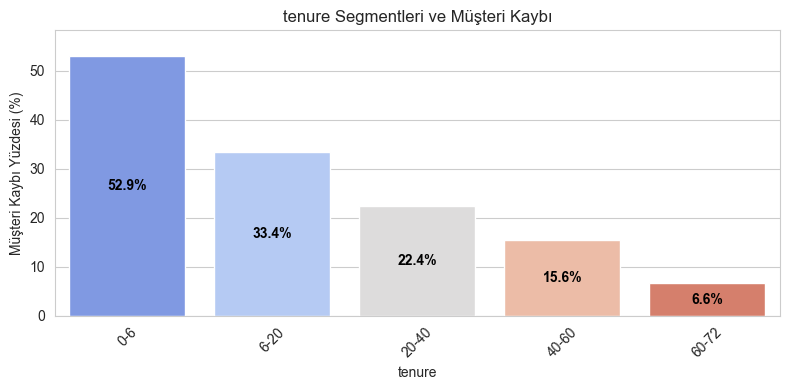

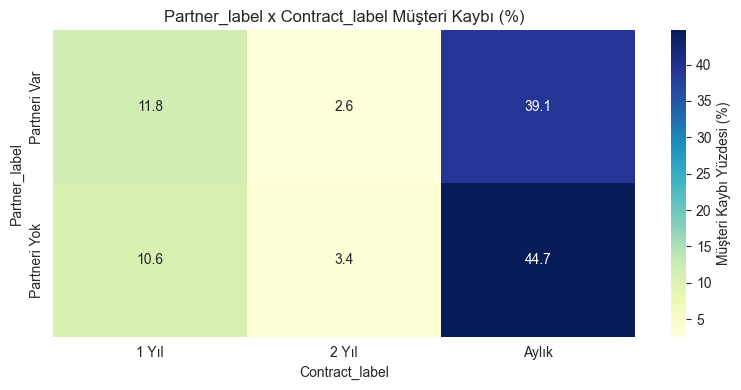

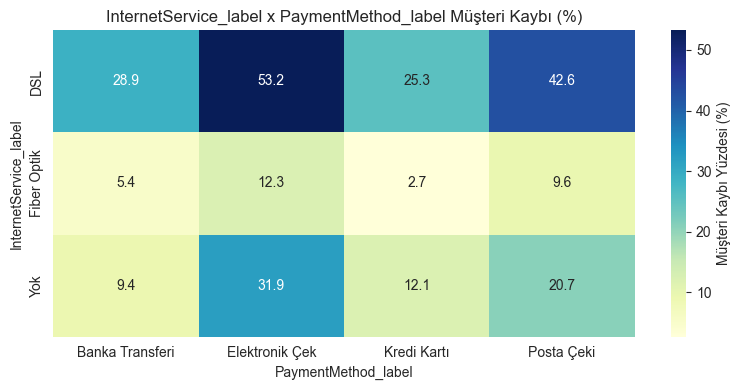

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

# ----------------------
# 0️⃣ Kategorik mapping ve Türkçeleştirme
# ----------------------
category_maps = {
    'gender': {0: 'Kadın', 1: 'Erkek'},
    'Partner': {0: 'Partneri Yok', 1: 'Partneri Var'},
    'Dependents': {0: 'Bakmakla Yükümlü Yok', 1: 'Bakmakla Yükümlü Var'},
    'SeniorCitizen': {0: 'Genç', 1: 'Yaşlı'},
    'Contract': {0: 'Aylık', 1: '1 Yıl', 2: '2 Yıl'},
    'PaymentMethod': {0: 'Banka Transferi', 1: 'Kredi Kartı', 2: 'Elektronik Çek', 3: 'Posta Çeki'},
    'InternetService': {0: 'Yok', 1: 'DSL', 2: 'Fiber Optik'}
}

for col, mapping in category_maps.items():
    df[col+'_label'] = df[col].map(mapping)

# ----------------------
# 1️⃣ Özellikleri ve hedefi belirle
# ----------------------
demographic = ['Partner_label', 'Dependents_label', 'gender_label', 'SeniorCitizen_label']
technical = ['InternetService_label', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PhoneService']
billing = ['MonthlyCharges', 'TotalCharges', 'Contract_label', 'PaymentMethod_label', 'PaperlessBilling']

all_features = demographic + technical + billing
target = 'Churn'

X = df[all_features]
y = df[target]

# ----------------------
# 2️⃣ Categorical ve numerical kolonları ayır
# ----------------------
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# ----------------------
# 3️⃣ Eğitim ve test seti
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------------
# 4️⃣ Preprocessing: OneHotEncoder
# ----------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# ----------------------
# 5️⃣ Logistic Regression modeli
# ----------------------
lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

print("📌 Logistic Regression Performansı")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------
# 6️⃣ Feature importance katsayıları
# ----------------------
ohe_features = lr_pipe.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
ohe_features_clean = [f.split('_')[-1] for f in ohe_features]
feature_names = list(ohe_features_clean) + numerical_cols

coefficients = lr_pipe.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Özellik': feature_names, 'Katsayı': coefficients})
coef_df = coef_df.sort_values(by='Katsayı', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Katsayı', y='Özellik', data=coef_df.head(20), palette='coolwarm')
plt.title('Logistic Regression - En Önemli 20 Özellik')
plt.xlabel('Katsayı')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()

# ----------------------
# 7️⃣ Continuous değişkenlerde kırılma noktaları
# ----------------------
continuous_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

for feature in continuous_features:
    bins = pd.qcut(df[feature], q=5, duplicates='drop')
    bin_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in bins.cat.categories]
    df[feature+'_bin_label'] = pd.qcut(df[feature], q=5, duplicates='drop', labels=bin_labels)
    
    churn_percent = df.groupby(feature+'_bin_label')['Churn'].mean() * 100
    
    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=churn_percent.index, y=churn_percent.values, palette='coolwarm')
    for i, val in enumerate(churn_percent.values):
        ax.text(i, val/2, f'{val:.1f}%', ha='center', va='center', color='black', fontweight='bold')
    
    plt.xticks(rotation=45)
    plt.ylabel('Müşteri Kaybı Yüzdesi (%)')
    plt.xlabel(feature)
    plt.title(f'{feature} Segmentleri ve Müşteri Kaybı')
    plt.ylim(0, churn_percent.max()*1.1)
    plt.tight_layout()
    plt.show()

# ----------------------
# 8️⃣ Cross-analysis (kategori etkileşimleri)
# ----------------------
cross_features = [('Partner_label', 'Contract_label'), 
                  ('InternetService_label', 'PaymentMethod_label')]

for f1, f2 in cross_features:
    pivot = df.pivot_table(index=f1, columns=f2, values='Churn', aggfunc='mean') * 100
    
    plt.figure(figsize=(8,4))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Müşteri Kaybı Yüzdesi (%)'})
    plt.title(f'{f1} x {f2} Müşteri Kaybı (%)')
    plt.ylabel(f1)
    plt.xlabel(f2)
    plt.tight_layout()
    plt.show()


In [44]:
# ----------------------
# Yeni müşteri tahmini (Logistic Regression)
# ----------------------

# Örnek yeni müşteri verisi (tüm kategorik label'lar ve numerikler)
new_customer = {
    'Partner_label': 'Partneri Yok',
    'Dependents_label': 'Bakmakla Yükümlü Yok',
    'gender_label': 'Kadın',
    'SeniorCitizen_label': 'Genç',
    'InternetService_label': 'DSL',
    'OnlineSecurity': 1,
    'OnlineBackup': 0,
    'DeviceProtection': 1,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 0,
    'MultipleLines': 0,
    'PhoneService': 1,
    'MonthlyCharges': 75.5,
    'TotalCharges': 1500,
    'Contract_label': 'Aylık',
    'PaymentMethod_label': 'Kredi Kartı',
    'PaperlessBilling': 1
}

# DataFrame'e çevir
new_df = pd.DataFrame([new_customer])

# Pipeline'daki Logistic Regression modeli
lr_pipe = results['Logistic Regression']['model']

# Tahmin (0 = kalır, 1 = ayrılır)
prediction = lr_pipe.predict(new_df)[0]

# Olasılık tahmini (1 sınıfı = ayrılacak olasılığı)
probability = lr_pipe.predict_proba(new_df)[0][1]

# Sonucu yazdır
if prediction == 1:
    print(f"Müşteri ayrılacak. Tahmini olasılık: %{probability*100:.2f}")
else:
    print(f"Müşteri ayrılmayacak. Tahmini olasılık: %{probability*100:.2f}")


Müşteri ayrılacak. Tahmini olasılık: %55.00


In [45]:
# ----------------------
# 1️⃣ Yeni müşteri verisi (örnek)
# ----------------------
new_customer = {
    'Partner_label': 'Partneri Var',
    'Dependents_label': 'Bakmakla Yükümlü Yok',
    'gender_label': 'Erkek',
    'SeniorCitizen_label': 'Genç',
    'InternetService_label': 'Fiber Optik',
    'OnlineSecurity': 0,
    'OnlineBackup': 1,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 1,
    'MultipleLines': 0,
    'PhoneService': 1,
    'MonthlyCharges': 120.5,
    'TotalCharges': 240.0,
    'Contract_label': 'Aylık',
    'PaymentMethod_label': 'Elektronik Çek',
    'PaperlessBilling': 1
}

# ----------------------
# 2️⃣ Yeni müşteri dataframe haline getir
# ----------------------
new_df = pd.DataFrame([new_customer])

# ----------------------
# 3️⃣ Model: Logistic Regression ile tahmin
# ----------------------
lr_model = results['Logistic Regression']['model']

# predict_proba ile olasılıkları alıyoruz
probas = lr_model.predict_proba(new_df)[0]
# 0 -> Ayrılmayacak, 1 -> Ayrılacak
prob_no = probas[0] * 100
prob_yes = probas[1] * 100

# predict ile sınıf tahmini
prediction = lr_model.predict(new_df)[0]
prediction_text = 'Ayrılacak' if prediction == 1 else 'Kalmaya Devam Edecek'

# ----------------------
# 4️⃣ Çıktıyı yazdır
# ----------------------
print(f"Yeni Müşteri Tahmini: {prediction_text}")
print(f"İhtimal ile: Ayrılmayacak %{prob_no:.1f}, Ayrılacak %{prob_yes:.1f}")


Yeni Müşteri Tahmini: Ayrılacak
İhtimal ile: Ayrılmayacak %14.8, Ayrılacak %85.2


In [46]:
customers = [
    {
        'name': 'Müşteri 1',
        'Partner_label': 'Partneri Var',
        'Dependents_label': 'Bakmakla Yükümlü Yok',
        'gender_label': 'Erkek',
        'SeniorCitizen_label': 'Genç',
        'InternetService_label': 'Fiber Optik',
        'OnlineSecurity': 0,
        'OnlineBackup': 1,
        'DeviceProtection': 0,
        'TechSupport': 0,
        'StreamingTV': 1,
        'StreamingMovies': 1,
        'MultipleLines': 0,
        'PhoneService': 1,
        'MonthlyCharges': 120.5,
        'TotalCharges': 240.0,
        'Contract_label': 'Aylık',
        'PaymentMethod_label': 'Elektronik Çek',
        'PaperlessBilling': 1
    },
    {
        'name': 'Müşteri 2',
        'Partner_label': 'Partneri Yok',
        'Dependents_label': 'Bakmakla Yükümlü Yok',
        'gender_label': 'Kadın',
        'SeniorCitizen_label': 'Genç',
        'InternetService_label': 'DSL',
        'OnlineSecurity': 1,
        'OnlineBackup': 1,
        'DeviceProtection': 1,
        'TechSupport': 1,
        'StreamingTV': 0,
        'StreamingMovies': 0,
        'MultipleLines': 0,
        'PhoneService': 1,
        'MonthlyCharges': 55.0,
        'TotalCharges': 1800.0,
        'Contract_label': '2 Yıl',
        'PaymentMethod_label': 'Kredi Kartı',
        'PaperlessBilling': 0
    },
    {
        'name': 'Müşteri 3',
        'Partner_label': 'Partneri Yok',
        'Dependents_label': 'Bakmakla Yükümlü Var',
        'gender_label': 'Erkek',
        'SeniorCitizen_label': 'Yaşlı',
        'InternetService_label': 'Fiber Optik',
        'OnlineSecurity': 0,
        'OnlineBackup': 0,
        'DeviceProtection': 0,
        'TechSupport': 0,
        'StreamingTV': 1,
        'StreamingMovies': 1,
        'MultipleLines': 1,
        'PhoneService': 1,
        'MonthlyCharges': 95.0,
        'TotalCharges': 800.0,
        'Contract_label': 'Aylık',
        'PaymentMethod_label': 'Elektronik Çek',
        'PaperlessBilling': 1
    },
    {
        'name': 'Müşteri 4',
        'Partner_label': 'Partneri Var',
        'Dependents_label': 'Bakmakla Yükümlü Var',
        'gender_label': 'Kadın',
        'SeniorCitizen_label': 'Genç',
        'InternetService_label': 'Yok',
        'OnlineSecurity': 0,
        'OnlineBackup': 0,
        'DeviceProtection': 0,
        'TechSupport': 0,
        'StreamingTV': 0,
        'StreamingMovies': 0,
        'MultipleLines': 0,
        'PhoneService': 1,
        'MonthlyCharges': 30.0,
        'TotalCharges': 3000.0,
        'Contract_label': '1 Yıl',
        'PaymentMethod_label': 'Banka Transferi',
        'PaperlessBilling': 0
    },
    {
        'name': 'Müşteri 5',
        'Partner_label': 'Partneri Yok',
        'Dependents_label': 'Bakmakla Yükümlü Yok',
        'gender_label': 'Erkek',
        'SeniorCitizen_label': 'Genç',
        'InternetService_label': 'Fiber Optik',
        'OnlineSecurity': 0,
        'OnlineBackup': 0,
        'DeviceProtection': 0,
        'TechSupport': 0,
        'StreamingTV': 1,
        'StreamingMovies': 1,
        'MultipleLines': 1,
        'PhoneService': 1,
        'MonthlyCharges': 110.0,
        'TotalCharges': 600.0,
        'Contract_label': 'Aylık',
        'PaymentMethod_label': 'Elektronik Çek',
        'PaperlessBilling': 1
    }
]


In [47]:
lr_model = results['Logistic Regression']['model']

results_list = []

for c in customers:
    name = c.pop('name')
    df_cust = pd.DataFrame([c])
    
    probas = lr_model.predict_proba(df_cust)[0]
    churn_prob = probas[1] * 100
    
    results_list.append({
        'Müşteri': name,
        'Ayrılma Olasılığı (%)': churn_prob
    })

prob_df = pd.DataFrame(results_list)
prob_df


,Müşteri,Ayrılma Olasılığı (%)
0,Müşteri 1,85.210675
1,Müşteri 2,6.160413
2,Müşteri 3,73.959136
3,Müşteri 4,3.704567
4,Müşteri 5,82.488920


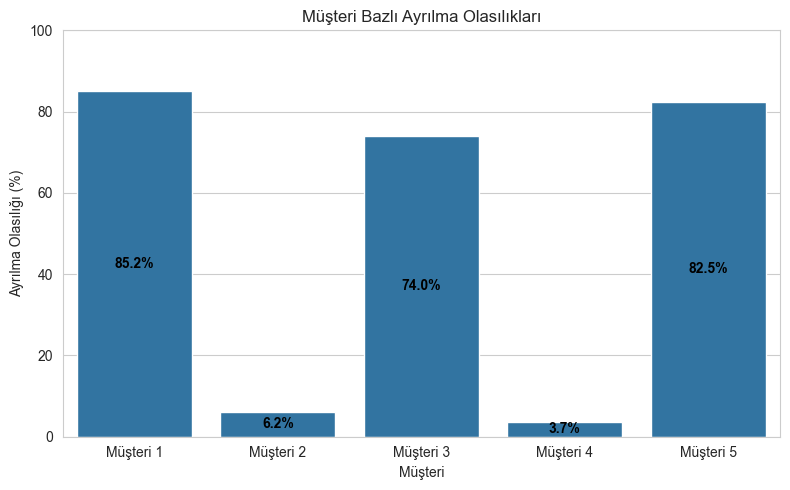

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Müşteri',
    y='Ayrılma Olasılığı (%)',
    data=prob_df
)

for i, val in enumerate(prob_df['Ayrılma Olasılığı (%)']):
    plt.text(i, val/2, f'{val:.1f}%', ha='center', va='center', color='black', fontweight='bold')

plt.title('Müşteri Bazlı Ayrılma Olasılıkları')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [57]:
def generate_customers(n):
    customers = []

    for i in range(n):
        customer = {
            'Partner_label': np.random.choice(['Partneri Var', 'Partneri Yok']),
            'Dependents_label': np.random.choice(['Bakmakla Yükümlü Var', 'Bakmakla Yükümlü Yok']),
            'gender_label': np.random.choice(['Erkek', 'Kadın']),
            'SeniorCitizen_label': np.random.choice(['Genç', 'Yaşlı']),
            'InternetService_label': np.random.choice(['Fiber Optik', 'DSL', 'Yok']),
            'OnlineSecurity': np.random.choice([0,1]),
            'OnlineBackup': np.random.choice([0,1]),
            'DeviceProtection': np.random.choice([0,1]),
            'TechSupport': np.random.choice([0,1]),
            'StreamingTV': np.random.choice([0,1]),
            'StreamingMovies': np.random.choice([0,1]),
            'MultipleLines': np.random.choice([0,1]),
            'PhoneService': np.random.choice([0,1]),
            'MonthlyCharges': np.random.uniform(20, 130),
            'TotalCharges': np.random.uniform(50, 5000),
            'Contract_label': np.random.choice(['Aylık', '1 Yıllık', '2 Yıllık']),
            'PaymentMethod_label': np.random.choice([
                'Elektronik Çek', 'Kredi Kartı', 'Banka Transferi'
            ]),
            'PaperlessBilling': np.random.choice([0,1])
        }
        customers.append(customer)

    return pd.DataFrame(customers)


In [58]:
def predict_churn_probabilities(df, model):
    probs = model.predict_proba(df)[:,1] * 100
    return probs


In [59]:
def plot_churn_bar_chart(n_customers, model):
    df = generate_customers(n_customers)
    churn_probs = predict_churn_probabilities(df, model)

    plt.figure()
    plt.bar(range(1, n_customers + 1), churn_probs)
    plt.xlabel("Customer Index")
    plt.ylabel("Churn Probability (%)")
    plt.title(f"Churn Probabilities for {n_customers} Customers")
    plt.show()


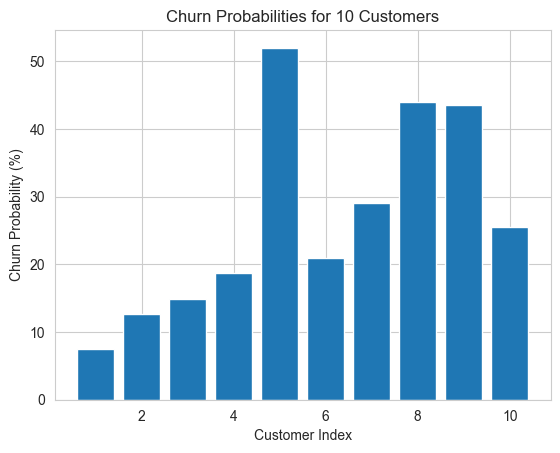

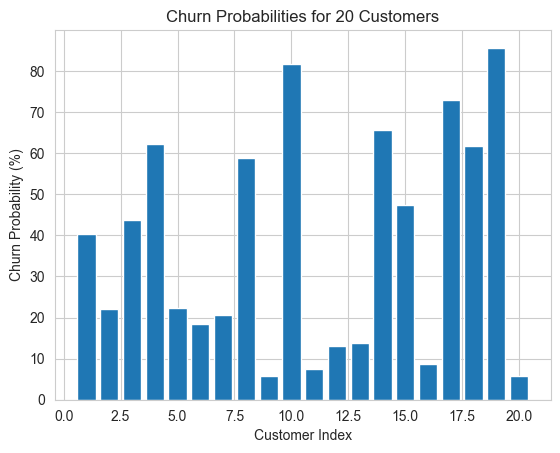

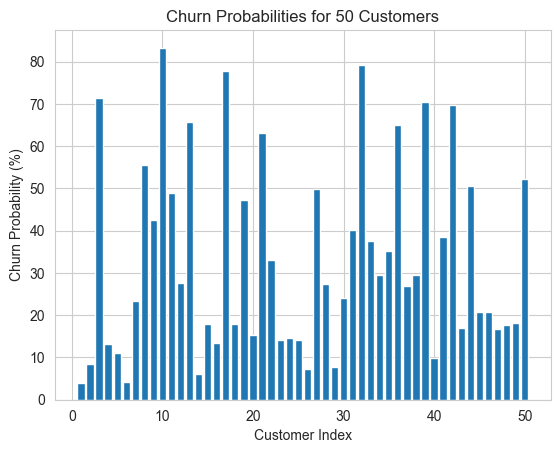

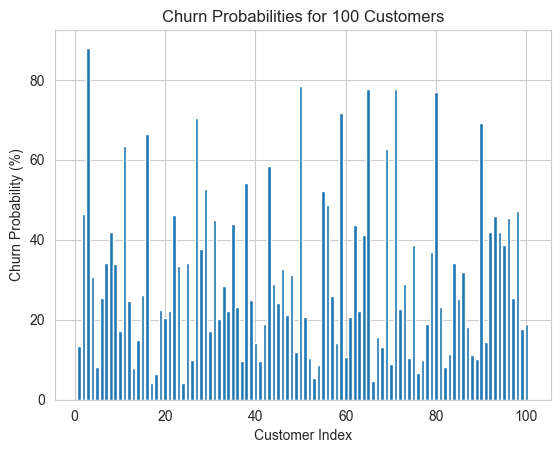

In [60]:
lr_model = results['Logistic Regression']['model']

for n in [10, 20, 50, 100]:
    plot_churn_bar_chart(n, lr_model)
